# Importy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

#random seed dovoľuje numpy generovať pseudo náhodné hodnoty.
np.random.seed(0)

# Dataset (MNIST)

In [2]:
from keras.datasets import mnist
#načítanie datasetu mnist do premenných z databázy Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
#výpis dimenzií jednotlivých premenných pre kontrolu správnosti načítania datasetu
#máme 60000 obrázkov číslic 28x28 a 60000 labelov v trénovacej množine
# a v testovacej máme 10000 hodnôt
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Vizualizovanie datasetu

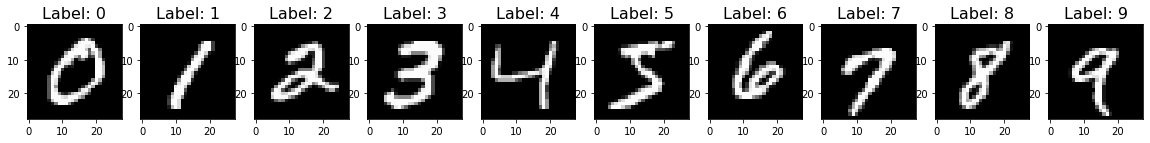

In [4]:
num_classes = 10 #pre vizualizovanie čísiel 0-9
f, ax = plt.subplots(1, num_classes, figsize=(20,20))#1 riadok, num_classes stlpcov a veľkosť grafu je 20x20

for i in range(0, num_classes): #0 až 10 (num_classes)
  sample = x_train[y_train == i][0] # vyberieme obrázok z x_train kde sa y_train(label) rovná i a vyberieme vždy prvý obrázok
  ax[i].imshow(sample, cmap='gray') #zobrazenie obrázku v každom grafe, grayscale
  ax[i].set_title("Label: {}".format(i), fontsize=16) #zobrazenie labelu nad každým grafom s prislúchajúcou hodnotou

In [5]:
#vypis labelov
for i in range(10):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


Pre klasifikovanie číslic musíme zmeniť labely z čísiel na samostatné classy, pretože ak by nejaká hodnota bola klasifikaná ako niečo medzi 4 a 5 tak label by bol 4,5 ale my chceme vidieť ku ktorej hodnote sa to najviac blíži.

In [6]:
#konvertovaie labelov z celých čisiel na binárnu maticu pre presné klasifikovanie
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
#vypis labelov po konvertovaní 
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Príprava datasetu
Dáta si najskôr musíme normalizovať aby sa zjednodušili výpočty neurónovej siete a aby boli menšie odchýlky. Moje dáta majú hodnoty od 0 po 255(RGB hodnoty obrázkov), takže trénovacie dáta vydelíme hodnotou 255 aby sme dostali hodnoty od 0 po 1 na miesto hodnôt od 0 po 255

In [8]:
#normalizácia hodnôt
x_train = x_train / 255.0
x_test = x_test / 255.0

Potrebujeme pretvarovať dáta, pretože teraz má každý obrázok rozmery 28x28 ale ak ich chceme poslať do neurónovej siete na spracovanie, musíme ich pretvarovať na jeden dlhý vektor(v tomto prípade bude mať veľkosť 784).

In [9]:
#pretvarovanie dát
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Vytvorenie modelu plne prepojenej neurónovej siete

In [10]:
model = Sequential()

model.add(Dense(units = 128, input_shape = (784,), activation = "relu"))
model.add(Dense(units = 128, activation="relu"))
model.add(Dropout(0.25)) # 25% neurónov bude neaktívnych počas trénovania, 
model.add(Dense(units=10, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Trénovanie neurónovej siete

In [11]:
batch_size = 512 # počet obrázkov, spracovávaných neurónovou sieťou v jednom momente
epochs = 10
history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 1s 3ms/step - loss: 1.0590 - accuracy: 0.6808
Epoch 2/10
118/118 [==============================] - 0s 3ms/step - loss: 0.2435 - accuracy: 0.9298
Epoch 3/10
118/118 [==============================] - 0s 3ms/step - loss: 0.1698 - accuracy: 0.9512
Epoch 4/10
118/118 [==============================] - 0s 3ms/step - loss: 0.1349 - accuracy: 0.9604
Epoch 5/10
118/118 [==============================] - 0s 3ms/step - loss: 0.1085 - accuracy: 0.9675
Epoch 6/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0908 - accuracy: 0.9723
Epoch 7/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0783 - accuracy: 0.9772
Epoch 8/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0648 - accuracy: 0.9803
Epoch 9/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0616 - accuracy: 0.9826
Epoch 10/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9844

In [12]:
print(history.history.keys()) # kľúčové hodnoty z nášho modelu

dict_keys(['loss', 'accuracy'])


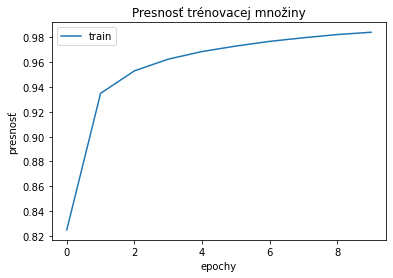

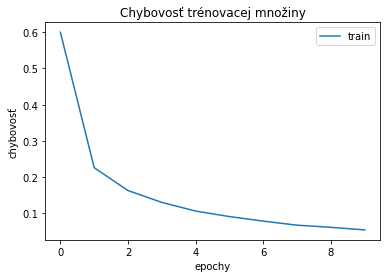

In [13]:
#graf prenosti trénovacej množiny v našej neurónovej sieti
plt.plot(history.history['accuracy'])
plt.title('Presnosť trénovacej množiny')
plt.ylabel('presnosť')
plt.xlabel('epochy')
plt.legend(['train'], loc='upper left')
plt.show()

#graf chybovosti trénovacej množiny v našej neurónovej sieti
plt.plot(history.history['loss'])
plt.title('Chybovosť trénovacej množiny')
plt.ylabel('chybovosť')
plt.xlabel('epochy')
plt.legend(['train'], loc='upper right')
plt.show()

# Vyhodnotenie testovacej množiny
Na našu natrénovanú neurónovú sieť použijeme testovacie dáta a zistíme, aká presná je naša sieť.

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)#výpočet chybovosti a presnosti nášho modelu na základe testovacích dát
print("Testovacia chybovosť: {}, Testovacia presnosť: {}".format(test_loss, test_acc))

313/313 [==============================] - 0s 381us/step - loss: 0.0723 - accuracy: 0.9788
Testovacia chybovosť: 0.07230373471975327, Testovacia presnosť: 0.9787999987602234


In [15]:
y_pred = model.predict(x_test) # vráti pole, obsahujúce pravdepodnost či každý prvok patrí nejakej triede(0-9)
y_pred_classes = np.argmax(y_pred, axis=1) # vráti nám 1D pole hodnôt, ktoré mali najvyššiu pravdepodobnosť, že boli správne
# predpovedané
print(y_pred)
print(y_pred_classes)

[[2.1146714e-06 4.5100041e-06 2.1358252e-04 ... 9.9934143e-01
  4.1547391e-06 4.5458141e-06]
 [3.1336660e-07 3.1860013e-04 9.9955851e-01 ... 3.3573991e-07
  9.6923020e-07 4.8535742e-10]
 [4.4954772e-06 9.9843174e-01 1.9040696e-04 ... 1.0389291e-03
  7.9967205e-05 5.4184866e-06]
 ...
 [1.7023620e-08 7.9265732e-08 1.3052553e-09 ... 3.0438955e-06
  9.1145034e-07 1.8477969e-05]
 [4.2065915e-09 7.3582606e-07 1.6222271e-10 ... 1.9213958e-07
  4.3825335e-06 2.3042659e-09]
 [1.0508901e-08 2.1314159e-09 6.2228401e-07 ... 2.3532018e-11
  6.4392502e-08 9.8273258e-11]]
[7 2 1 ... 4 5 6]


2


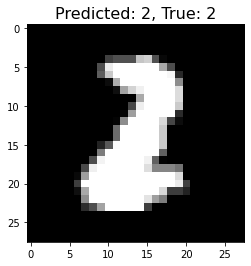

In [42]:
#Príklad na jednej hodnote
random_idx = np.random.choice(len(x_test))# výber náhodného indexu z x_test množiny
x_sample = x_test[random_idx] # výber hodnoty z test množiny na random_idx indexe(samotný obrázok)
y_true = np.argmax(y_test, axis=1) # číslené hodnoty labelov testovacej množiny
y_sample_true = y_true[random_idx] #naozajstná hodnota vykreslovanej číslice v grafe
y_sample_pred_class = y_pred_classes[random_idx] # predpovedaná hodnota vykreslovanej číslice v grafe

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap = 'gray')

Graf zobrazujúci koľko krát sme správne klasifikovali číslicu, aj koľko krát sme nesprávne klasifikovali a čo bola tá nesprávna hodnota

Text(0.5, 1.0, 'Matica zámen')

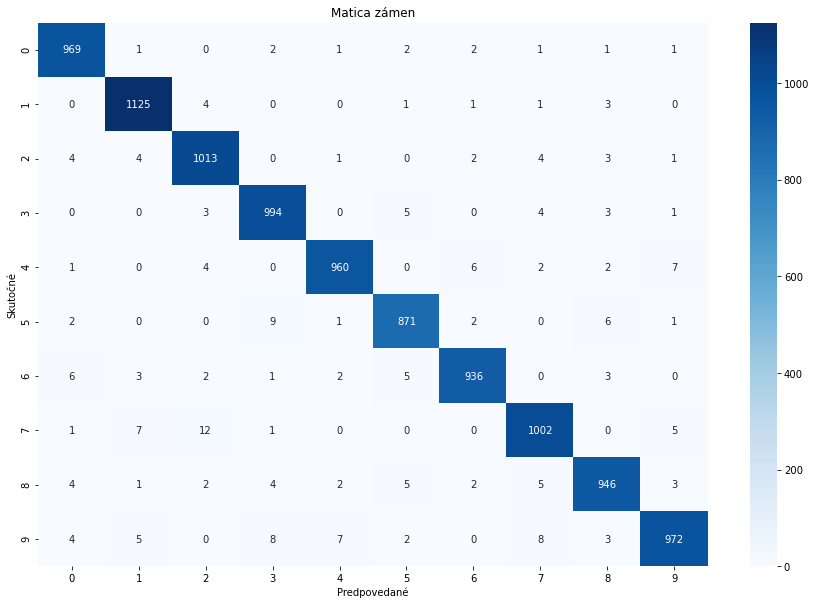

In [44]:
conf_mtx = confusion_matrix(y_true, y_pred_classes)

#Plot
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(conf_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predpovedané')
ax.set_ylabel('Skutočné')
ax.set_title('Matica zámen')